In [2]:
#the goal here is to demonstrate that to the winner goes the spoils, 
#an in particular, it is to the very winners that go almost all of the spoils

In [3]:
#thesis 1: few authors dominate the lists (winner takes all)
#thesis 2: few publishers dominate the lists (oligarchy)

In [4]:
#import dependencies
import psycopg2
import pandas as pd

In [5]:
#fetch isbn numbers from the database, then get their histories
con = psycopg2.connect("dbname='nytimes'") 
cur = con.cursor()    
cur.execute("SELECT * FROM books")
rows = cur.fetchall()
con.close()

In [6]:
data_frame = pd.DataFrame()
data_frame = pd.DataFrame(columns=('id','title', 'isbn', 'author', 'list', 'rank', 'date', 'weeks on list', 'description', 'contributor', 'publisher', 'updated frequency' ) )

In [8]:
#segment the data for iterative processing
test_length = 5000
test_data = data_frame.sample(test_length)

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

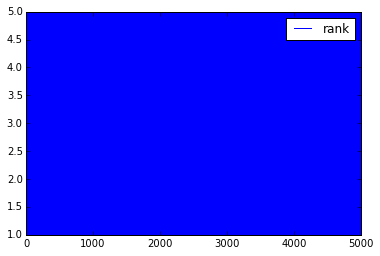

In [8]:
data_frame.plot()

In [115]:
data_frame.describe()

,rank
count,5000.000000
mean,3.000800
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [116]:
books_by_publisher = data_frame.groupby('publisher')
books_by_publisher.size()

publisher
Abrams                                        19
Abrams Books                                  20
Ace                                            1
Akashic                                        2
Akashic Books                                 12
Amber-Allen                                   23
America's Test Kitchen                         4
American Girl                                  3
Amulet                                         5
Amulet Books                                   6
Anchor                                        27
Andrews McMeel                                 1
Arcade                                         1
Artisan                                        2
Atheneum                                       7
Atlantic Monthly                               1
Atria                                         56
Atria/Keywords                                 8
Avery                                         38
B & H Publishing                               1
B&H       

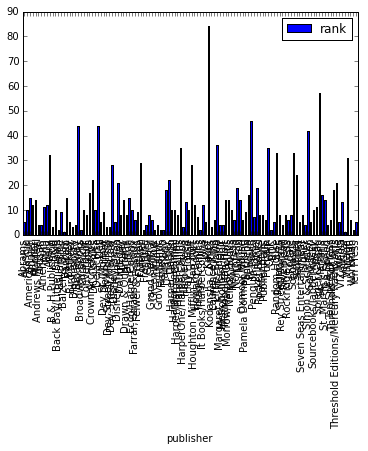

In [87]:
sales_totals = books_by_publisher.sum()
my_plot = sales_totals.plot(kind='bar')

In [117]:
inverse_rank = 6 - data_frame['rank']

In [118]:
data_frame['inverse rank'] = inverse_rank

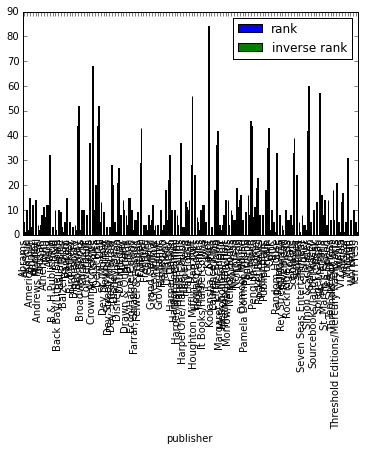

In [98]:
books_by_publisher = data_frame.groupby('publisher')
rank_value = books_by_publisher.sum()
my_plot = rank_value.plot(kind='bar')

In [119]:
publishers = data_frame[['publisher','title','inverse rank']]
publishers.head()

,publisher,title,inverse rank
0,Crown,THE MARTIAN,5
1,"Little, Brown",THE MURDER HOUSE,4
2,Pamela Dorman/Viking,AFTER YOU,3
3,Delacorte,MAKE ME,2
4,Knopf,THE GIRL IN THE SPIDER'S WEB,1


In [120]:
books_by_publisher = publishers.groupby('publisher')
publisher_rank = books_by_publisher.sum()


In [121]:
publisher_rank.sort('inverse rank', ascending = 0)

/Users/noahburbank/anaconda/envs/py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,inverse rank
publisher,
Simon & Schuster,991
Random House,524
"Little, Brown",476
Penguin,440
Scholastic,435
Spiegel & Grau,428
Crown,377
Knopf,331
Scribner,324
